In [49]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import os
import pickle
import re

import evaluation

import pandas as pd


In [50]:
!pwd

/home/peter/Documents/ML/rl_ipd


In [51]:
def rolling_average(xx, n_average):
    conv_vals = np.convolve(xx, np.ones(n_average))[:len(xx)]
    div_vals = np.ones(len(xx))*n_average
    end_div_vals = np.linspace(1, n_average, n_average)
    div_vals[:n_average] = end_div_vals
    return conv_vals/ div_vals



In [52]:
base_dir = '/home/peter/Documents/ML/rl_ipd/more_runs/'
# exp_dir = 'pretrain_randomlength1/'
exp_dir = 'pretrain_randomlength_long1/'

suffix = '1'


In [53]:
base_dir = '/home/peter/Documents/ML/rl_ipd/more_runs/'
# exp_dir = 'pretrain_randomlength1/'
exp_dir = 'pretrain_randomlength_long1/'
exp_dir = 'pretrain_randomlength_nodoneatend1/'

suffix = '1'
prefix = 'DQN'

In [54]:
os.listdir(base_dir + exp_dir+'/'+dir1)

FileNotFoundError: [Errno 2] No such file or directory: '/home/peter/Documents/ML/rl_ipd/more_runs/pretrain_randomlength_nodoneatend1//DQN_two_agent_MG_env_f14d1_00000_0_gamma=0.999,lr=0.001_2021-08-20_11-05-27'

In [55]:
os.listdir(base_dir + exp_dir)

['PPO_t4td_2',
 'PPO_t4td_1',
 'DQN_pt2',
 'PPO_t4t_1',
 'PPO_t4t_2',
 'PPO_t4t_pt1',
 'DQN2',
 'DQN1',
 'DQN_pt1',
 'PPO_t4td_pt2',
 'PPO_t4t_pt2',
 'PPO_t4td_pt1']

In [56]:
file1

'experiment_state-2021-11-12_00-50-50.json'

In [57]:
d = [1,2,3]
d[0]=np.array([3,45])

KeyboardInterrupt: 

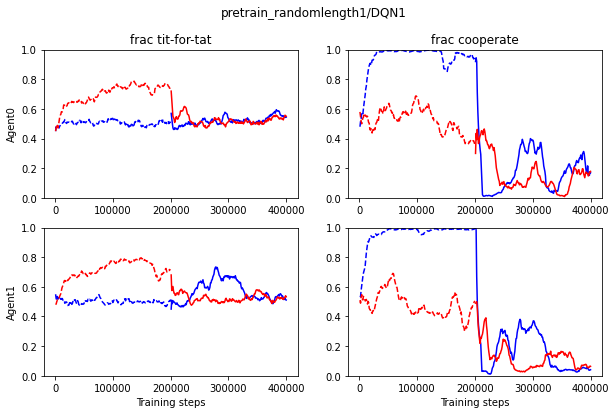

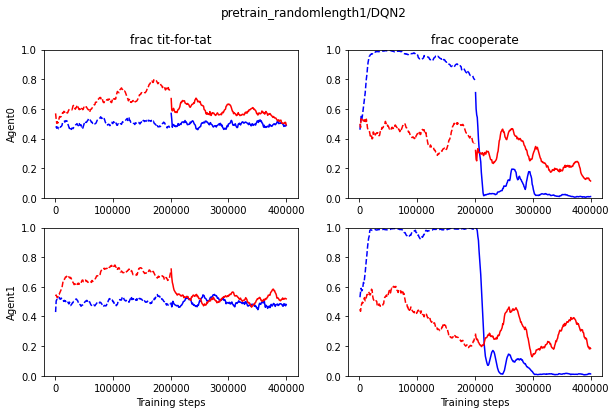

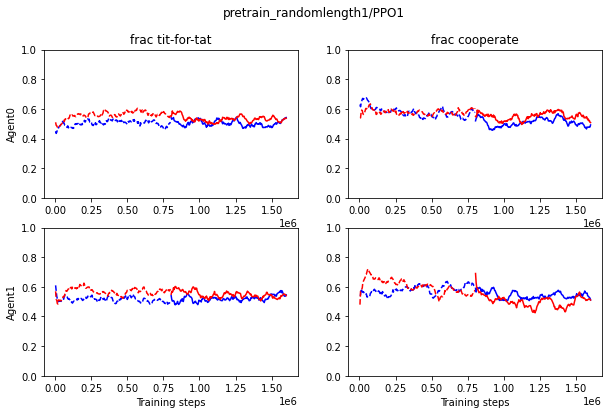

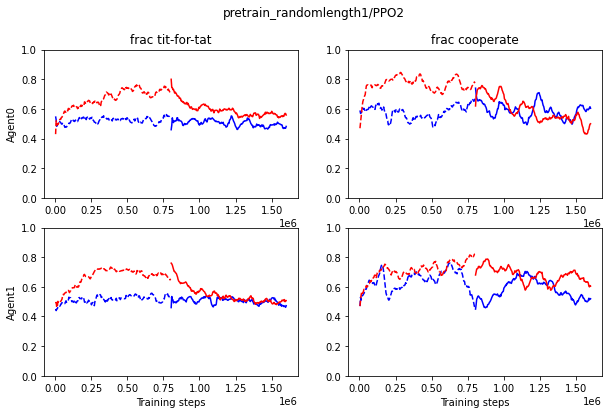

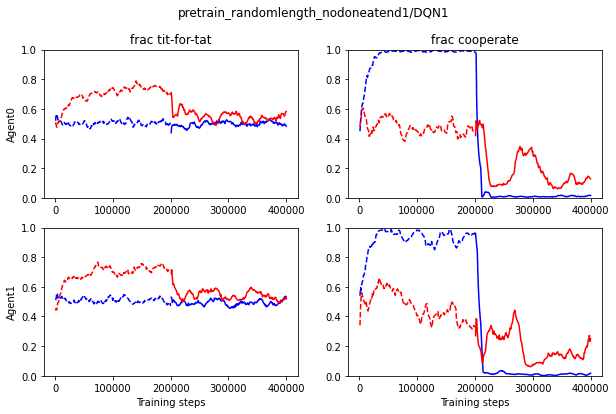

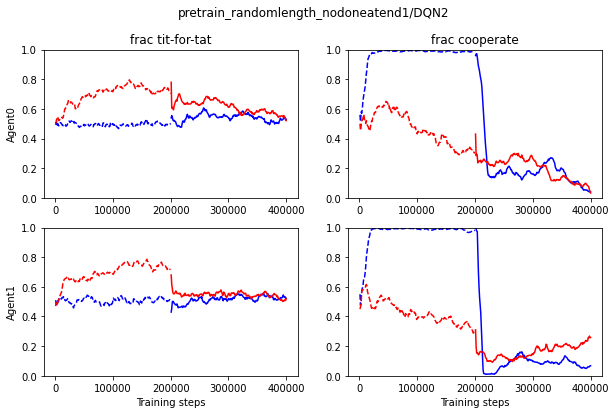

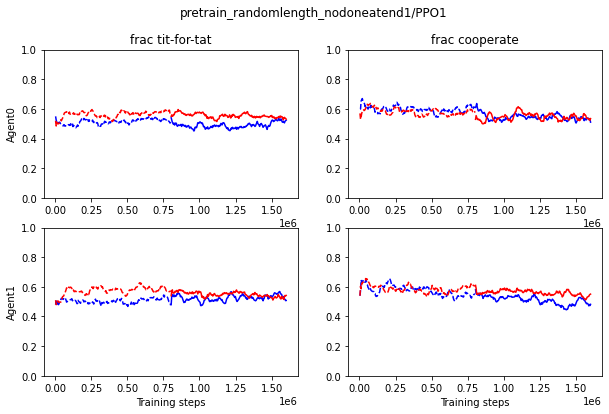

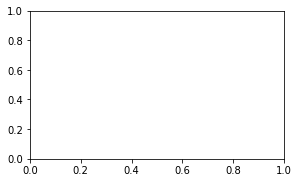

In [58]:
base_dir = '/home/peter/Documents/ML/rl_ipd/more_runs/pretrain/'
# exp_dir = 'pretrain_randomlength1/'
exp_dir = 'pretrain_randomlength_long1/'
exp_dir = 'pretrain_randomlength_nodoneatend1/'

exp_dirs = ['pretrain_randomlength1/', 'pretrain_randomlength_nodoneatend1/','pretrain_randomlength_long1/',]

# exp_dirs = [exp_dirs[-1]]
# exp_dirs = exp_dirs[:-1]

suffixes = ['1', '2']
prefixes = ['DQN', 'PPO']

for exp_dir in exp_dirs:
    for prefix in prefixes:
        for suffix in suffixes:
            
            exists = False
            data= np.zeros(4, dtype=np.object)
            data_list= []
            data_names = []
            data_episode_totals = []

            for dir_i, dir1 in enumerate(os.listdir(base_dir + exp_dir)):
                if dir1[-1] == suffix and dir1[:3]==prefix:
                    for file1 in os.listdir(base_dir + exp_dir+'/'+dir1):

                        if os.path.isdir(base_dir + exp_dir+'/'+dir1+'/'+ file1):

                            df1 = pd.read_csv(base_dir + exp_dir+'/'+dir1+'/'+ file1+'/progress.csv')
#                             print('===')
#                             print(dir1)
#                             print(file1)

                            data_list.append(df1)
                            data_names.append(file1)
                            data_episode_totals.append([df1['episodes_total'].iloc[0], df1['episodes_total'].iloc[-1]])
                            exists = True
            if not exists:
                continue

            data = np.zeros(4, dtype=np.object)
            other_inds = [0,1,2,3]
            for i in range(4):
                if 't4t_' in data_names[i]:
                    data[0] = data_list[i]
                    t4t_tots =data_episode_totals[i]
                    other_inds.pop(other_inds.index(i))

                if 't4td_' in data_names[i]:
                    data[1] = data_list[i]
                    t4td_tots = data_episode_totals[i]
                    other_inds.pop(other_inds.index(i))

            if t4t_tots[1] < t4td_tots[1]:
#                 t4t_bigger = True
                if data_episode_totals[other_inds[0]][0] < data_episode_totals[other_inds[1]][0]:
                    data[2] = data_list[other_inds[0]]
                    data[3] = data_list[other_inds[1]]
                else:
                    data[3] = data_list[other_inds[0]]
                    data[2] = data_list[other_inds[1]]
            else:
#                 t4t_bigger = False
                if data_episode_totals[other_inds[0]][0] > data_episode_totals[other_inds[1]][0]:
                    data[2] = data_list[other_inds[0]]
                    data[3] = data_list[other_inds[1]]
                else:
                    data[3] = data_list[other_inds[0]]
                    data[2] = data_list[other_inds[1]]            
            if exp_dir+ prefix + suffix == 'pretrain_randomlength1/DQN1':
                temp_df = data[3]
                data[3] = data[2]
                data[2] = temp_df
#             print(data_names)
#             print(data_episode_totals)
            colors = plt.cm.inferno(np.linspace(0,1,4))
            colors = ['red','blue','cyan', 'orange']
            colors = ['orange','cyan', 'red','blue']
            colors = ['orange','cyan','blue', 'red']
            colors = ['cyan','orange','blue', 'red']
            colors = ['blue', 'red','cyan','orange']
            colors = ['blue', 'red', 'blue', 'red']
            linestyles = ['--', '--', '-', '-']

            n_average = 10

            fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,6))
            
#             ax[0,0].plot([timesteps[0], timesteps[-1]] ,[0.5, 0.5])
            for i, df1 in enumerate(data):
                timesteps = df1['timesteps_total']#[::n_average]

            #     t4t_frac_agent0 = [np.mean(df1['t4t_frac_agent-0'][j:j+n_average]) for j in np.arange(0,len(df1['timesteps_total']), n_average)]
                t4t_frac_agent0 = rolling_average(df1['t4t_frac_agent-0'], n_average)
                t4t_frac_agent1 = rolling_average(df1['t4t_frac_agent-1'], n_average)
                coop_frac_agent0 = rolling_average(df1['coop_frac_agent-0'], n_average)
                coop_frac_agent1 = rolling_average(df1['coop_frac_agent-1'], n_average)

                ax[0,0].plot(timesteps, t4t_frac_agent0, color=colors[i], linestyle=linestyles[i])
            #     ax[0,0].plot(df1['timesteps_total'],df1['t4t_frac_agent-0'])
                ax[0,0].title.set_text('frac tit-for-tat')
                ax[0,0].set_ylabel('Agent0')
                ax[0,0].set_ylim([0,1])
                
                
                ax[0,1].plot(timesteps, coop_frac_agent0, color=colors[i], linestyle=linestyles[i])
                ax[0,1].title.set_text('frac cooperate')
                ax[0,1].set_ylim([0,1])
            
                ax[1,0].plot(timesteps, t4t_frac_agent1, color=colors[i], linestyle=linestyles[i])
#                 ax[1,0].title.set_text('t4t agent1')
                ax[1,0].set_ylabel('Agent1')
                ax[1,0].set_xlabel('Training steps')
                ax[1,0].set_ylim([0,1])

                ax[1,1].plot(timesteps, coop_frac_agent1, color=colors[i], linestyle=linestyles[i])
                ax[1,1].set_xlabel('Training steps')
                ax[1,1].set_ylim([0,1])
        
#                 ax[1,1].title.set_text('coop agent1')
            plt.suptitle(exp_dir+ prefix + suffix)
#             plt.tight_layout()
#             assert False
            plt.savefig(exp_dir[:-1]+'_'+ prefix + suffix + '_2x2', bbox_inches='tight')            

In [ ]:
base_dir = '/home/peter/Documents/ML/rl_ipd/more_runs/pretrain/'
# exp_dir = 'pretrain_randomlength1/'
exp_dir = 'pretrain_randomlength_long1/'
exp_dir = 'pretrain_randomlength_nodoneatend1/'

exp_dirs = ['pretrain_randomlength1/', 'pretrain_randomlength_nodoneatend1/','pretrain_randomlength_long1/',]

# exp_dirs = [exp_dirs[-1]]
# exp_dirs = exp_dirs[:-1]

suffixes = ['1', '2']
prefixes = ['DQN', 'PPO']

for exp_dir in exp_dirs:
    for prefix in prefixes:
        for suffix in suffixes:
            
            exists = False
            data= np.zeros(4, dtype=np.object)
            data_list= []
            data_names = []
            data_episode_totals = []

            for dir_i, dir1 in enumerate(os.listdir(base_dir + exp_dir)):
                if dir1[-1] == suffix and dir1[:3]==prefix:
                    for file1 in os.listdir(base_dir + exp_dir+'/'+dir1):

                        if os.path.isdir(base_dir + exp_dir+'/'+dir1+'/'+ file1):

                            df1 = pd.read_csv(base_dir + exp_dir+'/'+dir1+'/'+ file1+'/progress.csv')
#                             print('===')
#                             print(dir1)
#                             print(file1)

                            data_list.append(df1)
                            data_names.append(file1)
                            data_episode_totals.append([df1['episodes_total'].iloc[0], df1['episodes_total'].iloc[-1]])
                            exists = True
            if not exists:
                continue

            data = np.zeros(4, dtype=np.object)
            other_inds = [0,1,2,3]
            for i in range(4):
                if 't4t_' in data_names[i]:
                    data[0] = data_list[i]
                    t4t_tots =data_episode_totals[i]
                    other_inds.pop(other_inds.index(i))

                if 't4td_' in data_names[i]:
                    data[1] = data_list[i]
                    t4td_tots = data_episode_totals[i]
                    other_inds.pop(other_inds.index(i))

            if t4t_tots[1] < t4td_tots[1]:
#                 t4t_bigger = True
                if data_episode_totals[other_inds[0]][0] < data_episode_totals[other_inds[1]][0]:
                    data[2] = data_list[other_inds[0]]
                    data[3] = data_list[other_inds[1]]
                else:
                    data[3] = data_list[other_inds[0]]
                    data[2] = data_list[other_inds[1]]
            else:
#                 t4t_bigger = False
                if data_episode_totals[other_inds[0]][0] > data_episode_totals[other_inds[1]][0]:
                    data[2] = data_list[other_inds[0]]
                    data[3] = data_list[other_inds[1]]
                else:
                    data[3] = data_list[other_inds[0]]
                    data[2] = data_list[other_inds[1]]            
            if exp_dir+ prefix + suffix == 'pretrain_randomlength1/DQN1':
                temp_df = data[3]
                data[3] = data[2]
                data[2] = temp_df
#             print(data_names)
#             print(data_episode_totals)
            colors = plt.cm.inferno(np.linspace(0,1,4))
            colors = ['red','blue','cyan', 'orange']
            colors = ['orange','cyan', 'red','blue']
            colors = ['orange','cyan','blue', 'red']
            colors = ['cyan','orange','blue', 'red']
            colors = ['blue', 'red','cyan','orange']
            colors = ['blue', 'red', 'blue', 'red']
            linestyles = ['--', '--', '-', '-']

            n_average = 10

            fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,6))
            
#             ax[0,0].plot([timesteps[0], timesteps[-1]] ,[0.5, 0.5])
            for i, df1 in enumerate(data):
                timesteps = df1['timesteps_total']#[::n_average]

            #     t4t_frac_agent0 = [np.mean(df1['t4t_frac_agent-0'][j:j+n_average]) for j in np.arange(0,len(df1['timesteps_total']), n_average)]
                t4t_frac_agent0 = rolling_average(df1['t4t_frac_agent-0'], n_average)
                t4t_frac_agent1 = rolling_average(df1['t4t_frac_agent-1'], n_average)
                coop_frac_agent0 = rolling_average(df1['coop_frac_agent-0'], n_average)
                coop_frac_agent1 = rolling_average(df1['coop_frac_agent-1'], n_average)

                ax[0,0].plot(timesteps, t4t_frac_agent0, color=colors[i], linestyle=linestyles[i])
            #     ax[0,0].plot(df1['timesteps_total'],df1['t4t_frac_agent-0'])
                ax[0,0].title.set_text('frac tit-for-tat')
                ax[0,0].set_ylabel('Agent0')
                ax[0,0].set_ylim([0,1])
                
                
                ax[0,1].plot(timesteps, coop_frac_agent0, color=colors[i], linestyle=linestyles[i])
                ax[0,1].title.set_text('frac cooperate')
                ax[0,1].set_ylim([0,1])
            
                ax[1,0].plot(timesteps, t4t_frac_agent1, color=colors[i], linestyle=linestyles[i])
#                 ax[1,0].title.set_text('t4t agent1')
                ax[1,0].set_ylabel('Agent1')
                ax[1,0].set_xlabel('Training steps')
                ax[1,0].set_ylim([0,1])

                ax[1,1].plot(timesteps, coop_frac_agent1, color=colors[i], linestyle=linestyles[i])
                ax[1,1].set_xlabel('Training steps')
                ax[1,1].set_ylim([0,1])
        
#                 ax[1,1].title.set_text('coop agent1')
            plt.suptitle(exp_dir+ prefix + suffix)
#             plt.tight_layout()
#             assert False
            

In [ ]:
df1.training_iteration

In [ ]:
import matplotlib.colors as mcolors

In [ ]:
mcolors.CSS4_COLORS['lightblue'], 

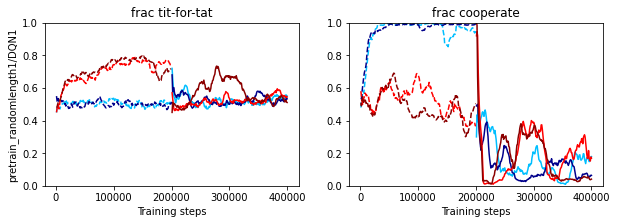

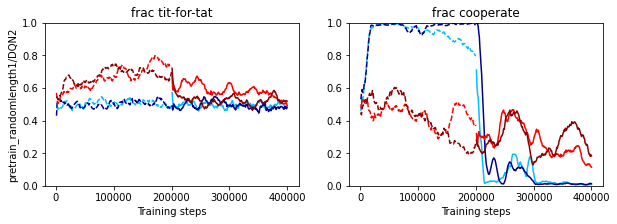

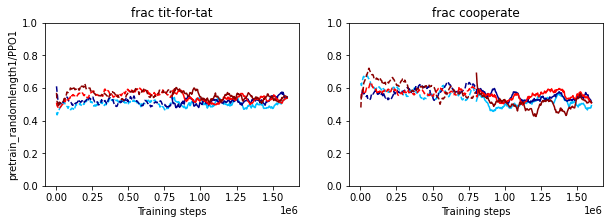

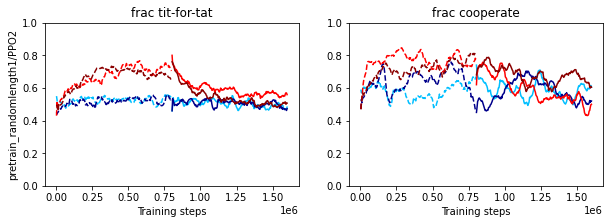

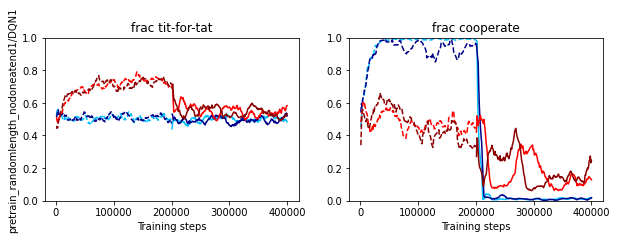

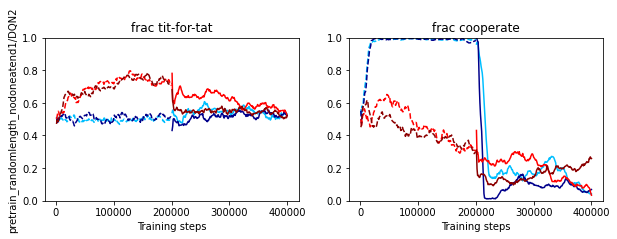

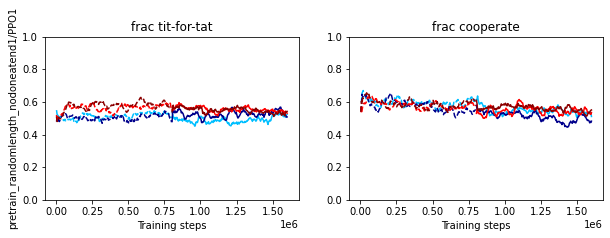

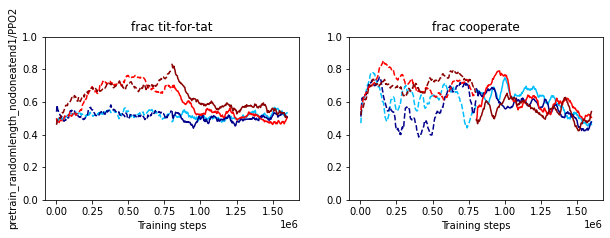

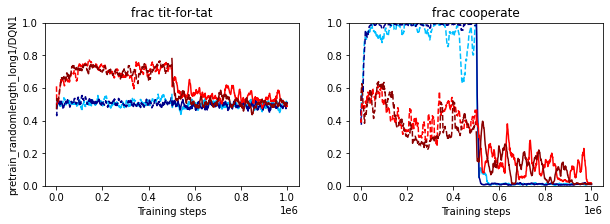

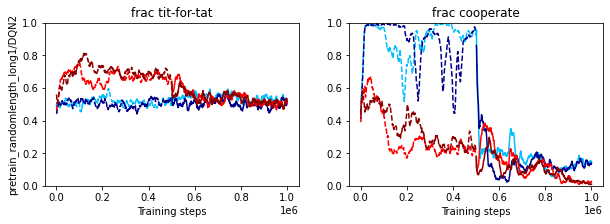

In [158]:
base_dir = '/home/peter/Documents/ML/rl_ipd/pretrain_1/runs/'
# exp_dir = 'pretrain_randomlength1/'
exp_dir = 'pretrain_randomlength_long1/'
exp_dir = 'pretrain_randomlength_nodoneatend1/'

base_dir = '/home/peter/Documents/ML/rl_ipd/more_runs/'

exp_dirs = ['pretrain_randomlength1/', 'pretrain_randomlength_nodoneatend1/','pretrain_randomlength_long1/',]
# exp_dirs = ['pretrain/']

# base_dir = '/home/peter/Documents/ML/rl_ipd/more_runs/'
# exp_dirs = ['pretrain_ppo1/']

# exp_dirs = [exp_dirs[-1]]
# exp_dirs = exp_dirs[:-1]

suffixes = ['1', '2']
prefixes = ['DQN', 'PPO']

for exp_dir in exp_dirs:
    for prefix in prefixes:
        for suffix in suffixes:
            
            exists = False
            data= np.zeros(4, dtype=np.object)
            data_list= []
            data_names = []
            data_episode_totals = []

            for dir_i, dir1 in enumerate(os.listdir(base_dir + exp_dir)):
                if dir1[-1] == suffix and dir1[:3]==prefix:
                    for file1 in os.listdir(base_dir + exp_dir+'/'+dir1):

                        if os.path.isdir(base_dir + exp_dir+'/'+dir1+'/'+ file1):

                            df1 = pd.read_csv(base_dir + exp_dir+'/'+dir1+'/'+ file1+'/progress.csv')
#                             print('===')
#                             print(dir1)
#                             print(file1)

                            data_list.append(df1)
                            data_names.append(file1)
                            data_episode_totals.append([df1['episodes_total'].iloc[0], df1['episodes_total'].iloc[-1]])
                            exists = True
            if not exists:
                continue

            data = np.zeros(4, dtype=np.object)
            other_inds = [0,1,2,3]
            for i in range(4):
                if 't4t_' in data_names[i]:
                    data[0] = data_list[i]
                    t4t_tots =data_episode_totals[i]
                    other_inds.pop(other_inds.index(i))

                if 't4td_' in data_names[i]:
                    data[1] = data_list[i]
                    t4td_tots = data_episode_totals[i]
                    other_inds.pop(other_inds.index(i))

            if t4t_tots[1] > t4td_tots[1]:
                t4t_bigger = True
                if data_episode_totals[other_inds[0]][0] > data_episode_totals[other_inds[1]][0]:
                    data[2] = data_list[other_inds[0]]
                    data[3] = data_list[other_inds[1]]
                else:
                    data[3] = data_list[other_inds[0]]
                    data[2] = data_list[other_inds[1]]
            else:
                t4t_bigger = False
                if data_episode_totals[other_inds[0]][0] < data_episode_totals[other_inds[1]][0]:
                    data[2] = data_list[other_inds[0]]
                    data[3] = data_list[other_inds[1]]
                else:
                    data[3] = data_list[other_inds[0]]
                    data[2] = data_list[other_inds[1]]            


            colors = plt.cm.inferno(np.linspace(0,1,4))
            colors = ['red','blue','cyan', 'orange']
            colors = ['orange','cyan', 'red','blue']
            colors = ['orange','cyan','blue', 'red']
            colors = ['cyan','orange','blue', 'red']
            colors = ['blue', 'red','cyan','orange']
            colors = ['blue', 'red', 'blue', 'red']
            colors = []
            colors.append([mcolors.CSS4_COLORS['lightblue'], mcolors.CSS4_COLORS['lightcoral'], 
                          mcolors.CSS4_COLORS['lightblue'], mcolors.CSS4_COLORS['lightcoral']])
            colors.append([mcolors.CSS4_COLORS['darkblue'], mcolors.CSS4_COLORS['darkred'], 
                          mcolors.CSS4_COLORS['darkblue'], mcolors.CSS4_COLORS['darkred']])
            
            colors = []
            colors.append([mcolors.CSS4_COLORS['deepskyblue'], mcolors.CSS4_COLORS['red'], 
                          mcolors.CSS4_COLORS['deepskyblue'], mcolors.CSS4_COLORS['red']])
            colors.append([mcolors.CSS4_COLORS['darkblue'], mcolors.CSS4_COLORS['darkred'], 
                          mcolors.CSS4_COLORS['darkblue'], mcolors.CSS4_COLORS['darkred']])
            
            linestyles = ['--', '--', '-', '-']

            n_average = 10


            fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,3))
            for i, df1 in enumerate(data):
                timesteps = df1['timesteps_total']#[::n_average]

            #     t4t_frac_agent0 = [np.mean(df1['t4t_frac_agent-0'][j:j+n_average]) for j in np.arange(0,len(df1['timesteps_total']), n_average)]
                t4t_frac_agent0 = rolling_average(df1['t4t_frac_agent-0'], n_average)
                t4t_frac_agent1 = rolling_average(df1['t4t_frac_agent-1'], n_average)
                coop_frac_agent0 = rolling_average(df1['coop_frac_agent-0'], n_average)
                coop_frac_agent1 = rolling_average(df1['coop_frac_agent-1'], n_average)

                ax[0].plot(timesteps, t4t_frac_agent0, color=colors[0][i], linestyle=linestyles[i])
            #     ax[0,0].plot(df1['timesteps_total'],df1['t4t_frac_agent-0'])
                ax[0].title.set_text('frac tit-for-tat')
#                 ax[0].set_ylabel('Agent0')
                ax[0].set_ylim([0,1])
                
                ax[1].plot(timesteps, coop_frac_agent0, color=colors[0][i], linestyle=linestyles[i])
                ax[1].title.set_text('frac cooperate')
                ax[1].set_ylim([0,1])
            
                ax[0].plot(timesteps, t4t_frac_agent1, color=colors[1][i], linestyle=linestyles[i])
#                 ax[1,0].title.set_text('t4t agent1')
                ax[0].set_ylabel(exp_dir+ prefix + suffix)
                ax[0].set_xlabel('Training steps')
                ax[0].set_ylim([0,1])

                ax[1].plot(timesteps, coop_frac_agent1, color=colors[1][i], linestyle=linestyles[i])
                ax[1].set_xlabel('Training steps')
                ax[1].set_ylim([0,1])
        
#                 ax[1,1].title.set_text('coop agent1')
#             plt.suptitle(exp_dir+ prefix + suffix)
#             plt.tight_layout()
            plt.savefig(exp_dir[:-1]+'_'+ prefix + suffix, bbox_inches='tight')

In [ ]:
base_dir = '/home/peter/Documents/ML/rl_ipd/pretrain_1/runs/'
# # exp_dir = 'pretrain_randomlength1/'
# exp_dir = 'pretrain_randomlength_long1/'
# exp_dir = 'pretrain_randomlength_nodoneatend1/'

# base_dir = '/home/peter/Documents/ML/rl_ipd/more_runs/'

# exp_dirs = ['pretrain_randomlength1/', 'pretrain_randomlength_nodoneatend1/','pretrain_randomlength_long1/',]

base_dir = '/home/peter/Documents/ML/rl_ipd/pretrain_1/runs/'
exp_dirs = ['pretrain/']

base_dir = '/home/peter/Documents/ML/rl_ipd/more_runs/'
exp_dirs = ['pretrain_ppo1/']

# exp_dirs = [exp_dirs[-1]]
# exp_dirs = exp_dirs[:-1]

suffixes = ['1', '2']
prefixes = ['DQN', 'PPO']

tfs = 13
xfs = 12

for exp_dir in exp_dirs:
    for prefix in prefixes:
        for suffix in suffixes:
            
            exists = False
            data= np.zeros(4, dtype=np.object)
            data_list= []
            data_names = []
            data_episode_totals = []

            for dir_i, dir1 in enumerate(os.listdir(base_dir + exp_dir)):
                if dir1[-1] == suffix and dir1[:3]==prefix:
                    for file1 in os.listdir(base_dir + exp_dir+'/'+dir1):

                        if os.path.isdir(base_dir + exp_dir+'/'+dir1+'/'+ file1):

                            df1 = pd.read_csv(base_dir + exp_dir+'/'+dir1+'/'+ file1+'/progress.csv')
#                             print('===')
#                             print(dir1)
#                             print(file1)

                            data_list.append(df1)
                            data_names.append(file1)
                            data_episode_totals.append([df1['episodes_total'].iloc[0], df1['episodes_total'].iloc[-1]])
                            exists = True
            if not exists:
                continue

            data = np.zeros(4, dtype=np.object)
            other_inds = [0,1,2,3]
            for i in range(4):
                if 't4t_' in data_names[i]:
                    data[0] = data_list[i]
                    t4t_tots =data_episode_totals[i]
                    other_inds.pop(other_inds.index(i))

                if 't4td_' in data_names[i]:
                    data[1] = data_list[i]
                    t4td_tots = data_episode_totals[i]
                    other_inds.pop(other_inds.index(i))

            if t4t_tots[1] > t4td_tots[1]:
                t4t_bigger = True
                if data_episode_totals[other_inds[0]][0] > data_episode_totals[other_inds[1]][0]:
                    data[2] = data_list[other_inds[0]]
                    data[3] = data_list[other_inds[1]]
                else:
                    data[3] = data_list[other_inds[0]]
                    data[2] = data_list[other_inds[1]]
            else:
                t4t_bigger = False
                if data_episode_totals[other_inds[0]][0] < data_episode_totals[other_inds[1]][0]:
                    data[2] = data_list[other_inds[0]]
                    data[3] = data_list[other_inds[1]]
                else:
                    data[3] = data_list[other_inds[0]]
                    data[2] = data_list[other_inds[1]]            


            colors = plt.cm.inferno(np.linspace(0,1,4))
            colors = ['red','blue','cyan', 'orange']
            colors = ['orange','cyan', 'red','blue']
            colors = ['orange','cyan','blue', 'red']
            colors = ['cyan','orange','blue', 'red']
            colors = ['blue', 'red','cyan','orange']
            colors = ['blue', 'red', 'blue', 'red']
            colors = []
            colors.append([mcolors.CSS4_COLORS['lightblue'], mcolors.CSS4_COLORS['lightcoral'], 
                          mcolors.CSS4_COLORS['lightblue'], mcolors.CSS4_COLORS['lightcoral']])
            colors.append([mcolors.CSS4_COLORS['darkblue'], mcolors.CSS4_COLORS['darkred'], 
                          mcolors.CSS4_COLORS['darkblue'], mcolors.CSS4_COLORS['darkred']])
            
            colors = []
            colors.append([mcolors.CSS4_COLORS['deepskyblue'], mcolors.CSS4_COLORS['red'], 
                          mcolors.CSS4_COLORS['deepskyblue'], mcolors.CSS4_COLORS['red']])
            colors.append([mcolors.CSS4_COLORS['darkblue'], mcolors.CSS4_COLORS['darkred'], 
                          mcolors.CSS4_COLORS['darkblue'], mcolors.CSS4_COLORS['darkred']])
            
            linestyles = ['--', '--', '-', '-']

            n_average = 10


            fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(9,2.5))
            for i, df1 in enumerate(data):
                timesteps = df1['training_iteration']#[::n_average]

            #     t4t_frac_agent0 = [np.mean(df1['t4t_frac_agent-0'][j:j+n_average]) for j in np.arange(0,len(df1['timesteps_total']), n_average)]
                t4t_frac_agent0 = rolling_average(df1['t4t_frac_agent-0'], n_average)
                t4t_frac_agent1 = rolling_average(df1['t4t_frac_agent-1'], n_average)
                coop_frac_agent0 = rolling_average(df1['coop_frac_agent-0'], n_average)
                coop_frac_agent1 = rolling_average(df1['coop_frac_agent-1'], n_average)

                ax[0].plot(timesteps, t4t_frac_agent0, color=colors[0][i], linestyle=linestyles[i])
            #     ax[0,0].plot(df1['timesteps_total'],df1['t4t_frac_agent-0'])
                ax[0].title.set_text('TFT Similarity')
                ax[0].title.set_size(tfs)
                
#                 ax[0].set_ylabel('Agent0')
                ax[0].set_ylim([0,1])
                
                ax[1].plot(timesteps, coop_frac_agent0, color=colors[0][i], linestyle=linestyles[i])
                ax[1].title.set_text('Cooperate Similarity')
                ax[1].title.set_size(tfs)
                
                ax[1].set_ylim([0,1])
            
                ax[0].plot(timesteps, t4t_frac_agent1, color=colors[1][i], linestyle=linestyles[i])
#                 ax[1,0].title.set_text('t4t agent1')
#                 ax[0].set_ylabel(exp_dir+ prefix + suffix)
                ax[0].set_xlabel('Training iteration')
                ax[0].xaxis.label.set_size(xfs)
    
                ax[0].set_ylim([0,1])

                ax[1].plot(timesteps, coop_frac_agent1, color=colors[1][i], linestyle=linestyles[i])
                ax[1].set_xlabel('Training iteration')
                ax[1].xaxis.label.set_size(xfs)
                
                ax[1].set_ylim([0,1])
        
#                 ax[1,1].title.set_text('coop agent1')
#             plt.suptitle(exp_dir+ prefix + suffix)
#             plt.tight_layout()
            plt.savefig(exp_dir[:-1]+'_'+ prefix + suffix, bbox_inches='tight')

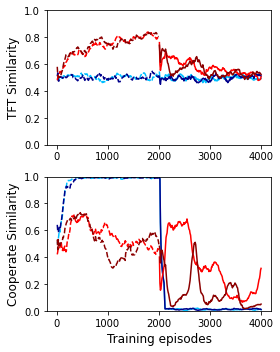

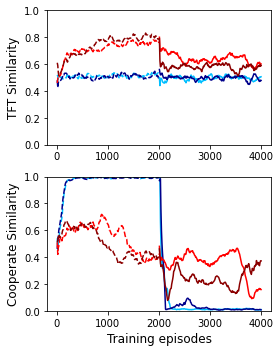

In [153]:
base_dir = '/home/peter/Documents/ML/rl_ipd/pretrain_1/runs/'
# # exp_dir = 'pretrain_randomlength1/'
# exp_dir = 'pretrain_randomlength_long1/'
# exp_dir = 'pretrain_randomlength_nodoneatend1/'

# base_dir = '/home/peter/Documents/ML/rl_ipd/more_runs/'

# exp_dirs = ['pretrain_randomlength1/', 'pretrain_randomlength_nodoneatend1/','pretrain_randomlength_long1/',]

base_dir = '/home/peter/Documents/ML/rl_ipd/pretrain_1/runs/'
exp_dirs = ['pretrain/']

# base_dir = '/home/peter/Documents/ML/rl_ipd/more_runs/'
# exp_dirs = ['pretrain_ppo1/']

# exp_dirs = [exp_dirs[-1]]
# exp_dirs = exp_dirs[:-1]

suffixes = ['1', '2']
prefixes = ['DQN', 'PPO']
prefixes = ['DQN']

tfs = 13
xfs = 12
yfs = 12

for exp_dir in exp_dirs:
    for prefix in prefixes:
        for suffix in suffixes:
            
            exists = False
            data= np.zeros(4, dtype=np.object)
            data_list= []
            data_names = []
            data_episode_totals = []

            for dir_i, dir1 in enumerate(os.listdir(base_dir + exp_dir)):
                if dir1[-1] == suffix and dir1[:3]==prefix:
                    for file1 in os.listdir(base_dir + exp_dir+'/'+dir1):

                        if os.path.isdir(base_dir + exp_dir+'/'+dir1+'/'+ file1):

                            df1 = pd.read_csv(base_dir + exp_dir+'/'+dir1+'/'+ file1+'/progress.csv')
#                             print('===')
#                             print(dir1)
#                             print(file1)

                            data_list.append(df1)
                            data_names.append(file1)
                            data_episode_totals.append([df1['episodes_total'].iloc[0], df1['episodes_total'].iloc[-1]])
                            exists = True
            if not exists:
                continue

#             data = np.zeros(4, dtype=np.object)
            other_inds = [0,1,2,3]
            for i in range(4):
                if 't4t_' in data_names[i]:
                    data[0] = data_list[i]
                    t4t_tots =data_episode_totals[i]
                    other_inds.pop(other_inds.index(i))

                if 't4td_' in data_names[i]:
                    data[1] = data_list[i]
                    t4td_tots = data_episode_totals[i]
                    other_inds.pop(other_inds.index(i))

            if t4t_tots[1] > t4td_tots[1]:
                t4t_bigger = True
                if data_episode_totals[other_inds[0]][0] > data_episode_totals[other_inds[1]][0]:
                    data[2] = data_list[other_inds[0]]
                    data[3] = data_list[other_inds[1]]
                else:
                    data[3] = data_list[other_inds[0]]
                    data[2] = data_list[other_inds[1]]
            else:
                t4t_bigger = False
                if data_episode_totals[other_inds[0]][0] < data_episode_totals[other_inds[1]][0]:
                    data[2] = data_list[other_inds[0]]
                    data[3] = data_list[other_inds[1]]
                else:
                    data[3] = data_list[other_inds[0]]
                    data[2] = data_list[other_inds[1]]            


            colors = plt.cm.inferno(np.linspace(0,1,4))
            colors = ['red','blue','cyan', 'orange']
            colors = ['orange','cyan', 'red','blue']
            colors = ['orange','cyan','blue', 'red']
            colors = ['cyan','orange','blue', 'red']
            colors = ['blue', 'red','cyan','orange']
            colors = ['blue', 'red', 'blue', 'red']
            colors = []
            colors.append([mcolors.CSS4_COLORS['lightblue'], mcolors.CSS4_COLORS['lightcoral'], 
                          mcolors.CSS4_COLORS['lightblue'], mcolors.CSS4_COLORS['lightcoral']])
            colors.append([mcolors.CSS4_COLORS['darkblue'], mcolors.CSS4_COLORS['darkred'], 
                          mcolors.CSS4_COLORS['darkblue'], mcolors.CSS4_COLORS['darkred']])
            
            colors = []
            colors.append([mcolors.CSS4_COLORS['deepskyblue'], mcolors.CSS4_COLORS['red'], 
                          mcolors.CSS4_COLORS['deepskyblue'], mcolors.CSS4_COLORS['red']])
            colors.append([mcolors.CSS4_COLORS['darkblue'], mcolors.CSS4_COLORS['darkred'], 
                          mcolors.CSS4_COLORS['darkblue'], mcolors.CSS4_COLORS['darkred']])
            
            linestyles = ['--', '--', '-', '-']

            n_average = 10


            fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(4,5))
            for i, df1 in enumerate(data):
#                 timesteps = df1['training_iteration']#[::n_average]
                timesteps = df1['episodes_total']#[::n_average]

            #     t4t_frac_agent0 = [np.mean(df1['t4t_frac_agent-0'][j:j+n_average]) for j in np.arange(0,len(df1['timesteps_total']), n_average)]
                t4t_frac_agent0 = rolling_average(df1['t4t_frac_agent-0'], n_average)
                t4t_frac_agent1 = rolling_average(df1['t4t_frac_agent-1'], n_average)
                coop_frac_agent0 = rolling_average(df1['coop_frac_agent-0'], n_average)
                coop_frac_agent1 = rolling_average(df1['coop_frac_agent-1'], n_average)

                ax[0].plot(timesteps, t4t_frac_agent0, color=colors[0][i], linestyle=linestyles[i])
            #     ax[0,0].plot(df1['timesteps_total'],df1['t4t_frac_agent-0'])
                ax[0].set_ylabel('TFT Similarity')
                ax[0].yaxis.label.set_size(yfs)
                
#                 ax[0].set_ylabel('Agent0')
                ax[0].set_ylim([0,1])
                
                ax[1].plot(timesteps, coop_frac_agent0, color=colors[0][i], linestyle=linestyles[i])

                ax[1].set_ylabel('Cooperate Similarity')
                ax[1].yaxis.label.set_size(yfs)                
                ax[1].set_ylim([0,1])
            
                ax[0].plot(timesteps, t4t_frac_agent1, color=colors[1][i], linestyle=linestyles[i])
#                 ax[1,0].title.set_text('t4t agent1')
#                 ax[0].set_ylabel(exp_dir+ prefix + suffix)
#                 ax[0].set_xlabel('Training iteration')
#                 ax[0].xaxis.label.set_size(xfs)
    
                ax[0].set_ylim([0,1])

                ax[1].plot(timesteps, coop_frac_agent1, color=colors[1][i], linestyle=linestyles[i])
                ax[1].set_xlabel('Training episodes')
                ax[1].xaxis.label.set_size(xfs)
                
                ax[1].set_ylim([0,1])
        
#                 ax[1,1].title.set_text('coop agent1')
#             plt.suptitle(exp_dir+ prefix + suffix)
            plt.tight_layout()
            plt.savefig(exp_dir[:-1]+'_'+ prefix + suffix, bbox_inches='tight', dpi=200)

In [160]:
df1

,episode_reward_max,episode_reward_min,episode_reward_mean,episode_len_mean,episodes_this_iter,num_healthy_workers,timesteps_total,agent_timesteps_total,done,episodes_total,...,info/learner/agent-0/learner_stats/min_q,info/learner/agent-0/learner_stats/max_q,info/learner/agent-0/learner_stats/mean_td_error,info/learner/agent-1/learner_stats/allreduce_latency,info/learner/agent-1/learner_stats/grad_gnorm,info/learner/agent-1/learner_stats/cur_lr,info/learner/agent-1/learner_stats/mean_q,info/learner/agent-1/learner_stats/min_q,info/learner/agent-1/learner_stats/max_q,info/learner/agent-1/learner_stats/mean_td_error
0,483.0,30.0,254.545455,44.363636,22,0,501000,1002000,False,14817,...,3.107283,14.222543,0.234683,0.0,1.141386,0.001,13.382068,2.626539,14.505848,0.253417
1,483.0,10.0,236.500000,46.880952,20,0,502000,1004000,False,14837,...,3.963553,13.983098,0.665952,0.0,0.207845,0.001,12.010182,3.813470,14.824158,1.693981
2,483.0,5.0,198.661290,48.048387,20,0,503000,1006000,False,14857,...,3.202797,14.519280,1.920822,0.0,0.120218,0.001,9.562150,3.263689,14.581452,1.335958
3,483.0,5.0,172.747126,45.827586,25,0,504000,1008000,False,14882,...,2.560463,15.098232,2.232887,0.0,0.070978,0.001,9.054116,3.002999,15.167210,0.884918
4,442.0,5.0,150.070000,44.260000,25,0,505000,1010000,False,14907,...,4.013458,15.254902,1.029825,0.0,0.189115,0.001,9.789383,3.365382,15.007114,1.403445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,210.0,4.0,107.910000,51.380000,19,0,996000,1992000,False,24683,...,3.833116,8.651352,-0.342512,0.0,0.040682,0.001,4.760464,2.740739,5.378463,-0.227274
496,210.0,4.0,103.810000,49.440000,24,0,997000,1994000,False,24707,...,3.322023,6.066576,-0.419605,0.0,0.038931,0.001,5.173868,4.544062,7.541741,0.032792
497,210.0,5.0,100.230000,47.710000,23,0,998000,1996000,False,24730,...,3.601754,9.909139,-0.115045,0.0,0.030651,0.001,5.264539,4.093082,7.430222,0.427588
498,208.0,5.0,103.030000,48.870000,19,0,999000,1998000,False,24749,...,3.223799,6.813090,0.417117,0.0,0.043486,0.001,5.056787,3.699176,7.321573,0.540887


In [157]:
data_dqn[0]

,episode_reward_max,episode_reward_min,episode_reward_mean,episode_len_mean,episodes_this_iter,num_healthy_workers,timesteps_total,agent_timesteps_total,done,episodes_total,...,info/learner/agent-0/learner_stats/min_q,info/learner/agent-0/learner_stats/max_q,info/learner/agent-0/learner_stats/mean_td_error,info/learner/agent-1/learner_stats/allreduce_latency,info/learner/agent-1/learner_stats/grad_gnorm,info/learner/agent-1/learner_stats/cur_lr,info/learner/agent-1/learner_stats/mean_q,info/learner/agent-1/learner_stats/min_q,info/learner/agent-1/learner_stats/max_q,info/learner/agent-1/learner_stats/mean_td_error
0,480.0,431.0,454.400,100.0,10,0,1000,2000,False,10,...,-0.497795,0.376649,-2.594675,0.0,3.288574,0.001,-0.029396,-0.644873,0.162478,-2.942904
1,480.0,412.0,443.650,100.0,10,0,2000,4000,False,20,...,0.332577,6.674551,0.229491,0.0,0.369199,0.001,3.264926,1.536326,5.948515,-0.099355
2,533.0,412.0,458.600,100.0,10,0,3000,6000,False,30,...,2.763798,7.928869,-0.296853,0.0,0.499330,0.001,6.935255,1.319278,9.534234,-0.067237
3,533.0,412.0,470.675,100.0,10,0,4000,8000,False,40,...,0.615768,11.160134,-0.029677,0.0,0.622965,0.001,8.518784,3.835229,11.444072,-0.392073
4,533.0,412.0,479.200,100.0,10,0,5000,10000,False,50,...,1.253686,12.906004,-0.849756,0.0,1.274424,0.001,10.662788,1.113652,12.633583,-1.080148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,601.0,593.0,598.030,100.0,10,0,196000,392000,False,1960,...,5.429655,14.815002,-0.177258,0.0,0.113813,0.001,14.279811,3.039875,14.998610,-0.065398
196,600.0,593.0,598.030,100.0,10,0,197000,394000,False,1970,...,3.128199,15.117921,0.173263,0.0,0.013509,0.001,14.256026,7.321557,14.984501,-0.005358
197,600.0,593.0,598.080,100.0,10,0,198000,396000,False,1980,...,2.809933,14.828634,-0.044077,0.0,0.208234,0.001,13.969584,5.377202,14.972708,-0.127036
198,600.0,593.0,598.140,100.0,10,0,199000,398000,False,1990,...,7.341341,14.851061,0.115390,0.0,0.073781,0.001,14.837394,11.099077,15.055297,-0.039096


In [155]:
data_dqn = data

In [ ]:
base_dir = '/home/peter/Documents/ML/rl_ipd/more_runs/'
# exp_dir = 'pretrain_randomlength1/'
exp_dir = 'pretrain_randomlength_long1/'
exp_dir = 'pretrain_randomlength_nodoneatend1/'

# exp_dirs = ['pretrain_randomlength1/', 'pretrain_randomlength_nodoneatend1/','pretrain_randomlength_long1/',]
exp_dirs = ['pretrain_ppo1/']
# exp_dirs = [exp_dirs[-1]]
# exp_dirs = exp_dirs[:-1]

suffixes = ['1', '2']
prefixes = ['PPO']

for exp_dir in exp_dirs:
    for prefix in prefixes:
        for suffix in suffixes:
            
            exists = False
            data= np.zeros(4, dtype=np.object)
            data_list= []
            data_names = []
            data_episode_totals = []

            for dir_i, dir1 in enumerate(os.listdir(base_dir + exp_dir)):
                if dir1[-1] == suffix and dir1[:3]==prefix:
                    for file1 in os.listdir(base_dir + exp_dir+'/'+dir1):

                        if os.path.isdir(base_dir + exp_dir+'/'+dir1+'/'+ file1):

                            df1 = pd.read_csv(base_dir + exp_dir+'/'+dir1+'/'+ file1+'/progress.csv')
#                             print('===')
#                             print(dir1)
#                             print(file1)
                            print(base_dir + exp_dir+'/'+dir1+'/'+ file1)
                            data_list.append(df1)
                            data_names.append(file1)
                            data_episode_totals.append([df1['episodes_total'].iloc[0], df1['episodes_total'].iloc[-1]])
                            exists = True
            if not exists:
                continue

            data = np.zeros(4, dtype=np.object)
            other_inds = [0,1,2,3]
            for i in range(4):
                if 't4t_' in data_names[i]:
                    data[0] = data_list[i]
                    t4t_tots =data_episode_totals[i]
                    other_inds.pop(other_inds.index(i))

                if 't4td_' in data_names[i]:
                    data[1] = data_list[i]
                    t4td_tots = data_episode_totals[i]
                    other_inds.pop(other_inds.index(i))

            if t4t_tots[1] > t4td_tots[1]:
                t4t_bigger = True
                if data_episode_totals[other_inds[0]][0] > data_episode_totals[other_inds[1]][0]:
                    data[2] = data_list[other_inds[0]]
                    data[3] = data_list[other_inds[1]]
                else:
                    data[3] = data_list[other_inds[0]]
                    data[2] = data_list[other_inds[1]]
            else:
                t4t_bigger = False
                if data_episode_totals[other_inds[0]][0] < data_episode_totals[other_inds[1]][0]:
                    data[2] = data_list[other_inds[0]]
                    data[3] = data_list[other_inds[1]]
                else:
                    data[3] = data_list[other_inds[0]]
                    data[2] = data_list[other_inds[1]]            


            colors = plt.cm.inferno(np.linspace(0,1,4))
            colors = ['red','blue','cyan', 'orange']
            colors = ['orange','cyan', 'red','blue']
            colors = ['orange','cyan','blue', 'red']
            colors = ['cyan','orange','blue', 'red']
            colors = ['blue', 'red','cyan','orange']
            colors = ['blue', 'red', 'blue', 'red']
            linestyles = ['--', '--', '-', '-']

            n_average = 10



            fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,6))
            for i, df1 in enumerate(data):
                timesteps = df1['timesteps_total']#[::n_average]

            #     t4t_frac_agent0 = [np.mean(df1['t4t_frac_agent-0'][j:j+n_average]) for j in np.arange(0,len(df1['timesteps_total']), n_average)]
                t4t_frac_agent0 = rolling_average(df1['t4t_frac_agent-0'], n_average)
                t4t_frac_agent1 = rolling_average(df1['t4t_frac_agent-1'], n_average)
                coop_frac_agent0 = rolling_average(df1['coop_frac_agent-0'], n_average)
                coop_frac_agent1 = rolling_average(df1['coop_frac_agent-1'], n_average)

                ax[0,0].plot(timesteps, t4t_frac_agent0, color=colors[i], linestyle=linestyles[i])
            #     ax[0,0].plot(df1['timesteps_total'],df1['t4t_frac_agent-0'])
                ax[0,0].title.set_text('frac tit-for-tat')
                ax[0,0].set_ylabel('Agent0')
                ax[0,0].set_ylim([0,1])
                
                ax[0,1].plot(timesteps, coop_frac_agent0, color=colors[i], linestyle=linestyles[i])
                ax[0,1].title.set_text('frac cooperate')
                ax[0,1].set_ylim([0,1])
            
                ax[1,0].plot(timesteps, t4t_frac_agent1, color=colors[i], linestyle=linestyles[i])
#                 ax[1,0].title.set_text('t4t agent1')
                ax[1,0].set_ylabel('Agent1')
                ax[1,0].set_xlabel('Training steps')
                ax[1,0].set_ylim([0,1])

                ax[1,1].plot(timesteps, coop_frac_agent1, color=colors[i], linestyle=linestyles[i])
                ax[1,1].set_xlabel('Training steps')
                ax[1,1].set_ylim([0,1])
        
#                 ax[1,1].title.set_text('coop agent1')
            plt.suptitle(exp_dir+ prefix + suffix)
#             plt.tight_layout()

In [9]:

data= np.zeros(4, dtype=np.object)
data_list= []
data_names = []
data_episode_totals = []

for dir_i, dir1 in enumerate(os.listdir(base_dir + exp_dir)):
    if dir1[-1] == suffix and dir1[:3]==prefix:
        for file1 in os.listdir(base_dir + exp_dir+'/'+dir1):
            
            if os.path.isdir(base_dir + exp_dir+'/'+dir1+'/'+ file1):
                
                df1 = pd.read_csv(base_dir + exp_dir+'/'+dir1+'/'+ file1+'/progress.csv')
                print('===')
                print(dir1)
                print(file1)
#                 assert False
#                 if 'pt' in dir1 and 't4t_' in file1:
#                     save_ind = 0
#                 elif 'pt' in dir1 and 't4td_' in file1:
#                     save_ind = 1
#                 elif data[2] == 0:
#                     save_ind = 2
#                 elif data[3] == 0:
#                     save_ind = 3
#                 else:
#                     print('whoops')
#                 data[save_ind] = df1
                data_list.append(df1)
                data_names.append(file1)
                data_episode_totals.append([df1['episodes_total'].iloc[0], df1['episodes_total'].iloc[-1]])
data = np.zeros(4, dtype=np.object)
other_inds = [0,1,2,3]
for i in range(4):
    if 't4t_' in data_names[i]:
        data[0] = data_list[i]
        t4t_tots =data_episode_totals[i]
        other_inds.pop(other_inds.index(i))
        
    if 't4td_' in data_names[i]:
        data[1] = data_list[i]
        t4td_tots = data_episode_totals[i]
        other_inds.pop(other_inds.index(i))

if t4t_tots[1] > t4td_tots[1]:
    t4t_bigger = True
    if data_episode_totals[other_inds[0]][0] > data_episode_totals[other_inds[1]][0]:
        data[2] = data_list[other_inds[0]]
        data[3] = data_list[other_inds[1]]
    else:
        data[3] = data_list[other_inds[0]]
        data[2] = data_list[other_inds[1]]
else:
    t4t_bigger = False
    if data_episode_totals[other_inds[0]][0] < data_episode_totals[other_inds[1]][0]:
        data[2] = data_list[other_inds[0]]
        data[3] = data_list[other_inds[1]]
    else:
        data[3] = data_list[other_inds[0]]
        data[2] = data_list[other_inds[1]]            


===
DQN1
DQN_two_agent_MG_env_6050e_00000_0_2021-10-05_19-20-46
===
DQN1
DQN_two_agent_MG_env_bc964_00000_0_2021-10-05_19-23-21
===
DQN_pt1
DQN_two_agent_t4t_MG_env_c2f79_00000_0_2021-10-05_17-00-22
===
DQN_pt1
DQN_two_agent_t4td_MG_env_aab64_00000_0_2021-10-05_16-59-41


In [10]:
df1

,episode_reward_max,episode_reward_min,episode_reward_mean,episode_len_mean,episodes_this_iter,num_healthy_workers,timesteps_total,agent_timesteps_total,done,episodes_total,...,info/learner/agent-0/learner_stats/min_q,info/learner/agent-0/learner_stats/max_q,info/learner/agent-0/learner_stats/mean_td_error,info/learner/agent-1/learner_stats/allreduce_latency,info/learner/agent-1/learner_stats/grad_gnorm,info/learner/agent-1/learner_stats/cur_lr,info/learner/agent-1/learner_stats/mean_q,info/learner/agent-1/learner_stats/min_q,info/learner/agent-1/learner_stats/max_q,info/learner/agent-1/learner_stats/mean_td_error
0,354.0,11.0,123.741935,31.903226,31,0,1000,2000,False,31,...,-0.011757,1.123207,-2.472710,0.0,2.894915,0.001,0.057893,-0.060146,0.430976,-1.757694
1,354.0,11.0,134.218182,36.363636,24,0,2000,4000,False,55,...,4.637141,11.667742,1.720979,0.0,1.099235,0.001,4.347501,2.190456,7.324404,0.596731
2,354.0,8.0,124.897727,34.022727,33,0,3000,6000,False,88,...,3.366310,11.115644,0.382939,0.0,1.681441,0.001,6.526878,1.809893,9.072038,0.878897
3,354.0,8.0,123.570000,32.500000,37,0,4000,8000,False,125,...,3.521971,13.172798,0.262433,0.0,0.588814,0.001,8.011974,2.175854,10.842138,0.712362
4,373.0,6.0,121.870000,29.290000,32,0,5000,10000,False,157,...,2.234297,13.362551,0.744361,0.0,0.579441,0.001,7.716963,1.902394,11.735776,0.678548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,425.0,6.0,160.520000,32.960000,33,0,196000,392000,False,5760,...,4.307774,14.042740,2.896459,0.0,0.054030,0.001,11.991267,3.900737,13.924533,3.324376
196,436.0,6.0,156.390000,32.520000,28,0,197000,394000,False,5788,...,3.552184,14.279724,4.035820,0.0,0.085798,0.001,11.746822,3.790548,14.220120,2.031558
197,436.0,12.0,148.880000,30.590000,38,0,198000,396000,False,5826,...,3.934125,14.337490,1.681047,0.0,0.044640,0.001,11.253309,3.573898,14.172465,2.826261
198,462.0,6.0,159.400000,33.090000,25,0,199000,398000,False,5851,...,4.328696,14.101259,1.452007,0.0,0.138220,0.001,11.492019,2.939169,14.373256,3.615075


In [11]:
data = np.zeros(4, dtype=np.object)
other_inds = [0,1,2,3]
for i in range(4):
    if 't4t_' in data_names[i]:
        data[0] = data_list[i]
        t4t_tots =data_episode_totals[i]
        other_inds.pop(other_inds.index(i))
        
    if 't4td_' in data_names[i]:
        data[1] = data_list[i]
        t4td_tots = data_episode_totals[i]
        other_inds.pop(other_inds.index(i))

if t4t_tots[1] > t4td_tots[1]:
    t4t_bigger = True
    if data_episode_totals[other_inds[0]][0] > data_episode_totals[other_inds[1]][0]:
        data[2] = data_list[other_inds[0]]
        data[3] = data_list[other_inds[1]]
    else:
        data[3] = data_list[other_inds[0]]
        data[2] = data_list[other_inds[1]]
else:
    t4t_bigger = False
    if data_episode_totals[other_inds[0]][0] < data_episode_totals[other_inds[1]][0]:
        data[2] = data_list[other_inds[0]]
        data[3] = data_list[other_inds[1]]
    else:
        data[3] = data_list[other_inds[0]]
        data[2] = data_list[other_inds[1]]

In [12]:
other_inds

[0, 1]

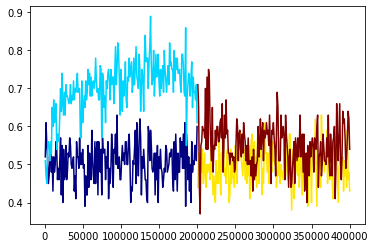

In [13]:
colors = plt.cm.jet(np.linspace(0,1,4))

for i, df1 in enumerate(data[:]):
    plt.plot(df1['timesteps_total'],df1['t4t_frac_agent-0'],color=colors[i])
#     plt.plot(df1['timesteps_total'],df1['t4t_frac_agent-1'], color=colors[i])

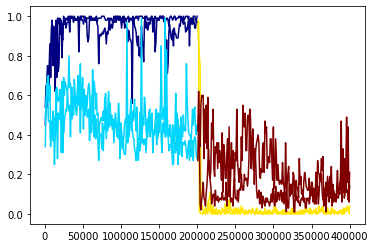

In [14]:
colors = plt.cm.jet(np.linspace(0,1,4))

for i, df1 in enumerate(data):
    plt.plot(df1['timesteps_total'],df1['coop_frac_agent-0'], color=colors[i])
    plt.plot(df1['timesteps_total'],df1['coop_frac_agent-1'], color=colors[i])

In [59]:
def rolling_average_both_ends(xx, n_average):
    conv_vals = np.convolve(xx, np.ones(n_average), 'same')
    div_vals = np.ones(len(xx))*n_average
    if n_average%2==0:
        end_div_vals = np.linspace(n_average//2, n_average, n_average//2+1)
        print(end_div_vals)
        div_vals[:n_average//2] = end_div_vals[:-1]
        div_vals[-n_average//2:]= end_div_vals[::-1][:-1]
        return conv_vals/ div_vals
    else:
        end_div_vals = np.linspace(n_average//2+1, n_average-1, n_average//2)
        print(end_div_vals)
        div_vals[:n_average//2] = end_div_vals#[:-1]
        div_vals[-n_average//2+1:]= end_div_vals[::-1]#[:-1]
        return conv_vals/ div_vals

In [60]:
def rolling_average(xx, n_average):
    conv_vals = np.convolve(xx, np.ones(n_average))[:len(xx)]
    div_vals = np.ones(len(xx))*n_average
    end_div_vals = np.linspace(1, n_average, n_average)
    div_vals[:n_average] = end_div_vals
    return conv_vals/ div_vals



In [17]:
rolling_average(np.ones(101),31)


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [18]:
n_average = 10
end_div_vals = np.linspace(n_average//2, n_average, n_average//2)
print(end_div_vals)

[ 5.    6.25  7.5   8.75 10.  ]


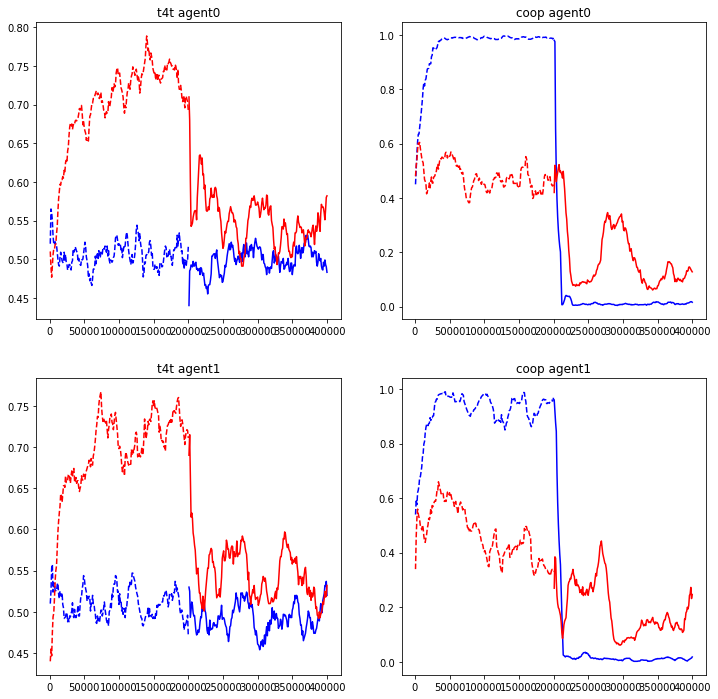

In [19]:
colors = plt.cm.inferno(np.linspace(0,1,4))
colors = ['red','blue','cyan', 'orange']
colors = ['orange','cyan', 'red','blue']
colors = ['orange','cyan','blue', 'red']
colors = ['cyan','orange','blue', 'red']
colors = ['blue', 'red','cyan','orange']
colors = ['blue', 'red', 'blue', 'red']
linestyles = ['--', '--', '-', '-']

n_average = 10

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,12))
for i, df1 in enumerate(data):
    timesteps = df1['timesteps_total']#[::n_average]
    
#     t4t_frac_agent0 = [np.mean(df1['t4t_frac_agent-0'][j:j+n_average]) for j in np.arange(0,len(df1['timesteps_total']), n_average)]
    t4t_frac_agent0 = rolling_average(df1['t4t_frac_agent-0'], n_average)
    t4t_frac_agent1 = rolling_average(df1['t4t_frac_agent-1'], n_average)
    coop_frac_agent0 = rolling_average(df1['coop_frac_agent-0'], n_average)
    coop_frac_agent1 = rolling_average(df1['coop_frac_agent-1'], n_average)
    
    ax[0,0].plot(timesteps, t4t_frac_agent0, color=colors[i], linestyle=linestyles[i])
#     ax[0,0].plot(df1['timesteps_total'],df1['t4t_frac_agent-0'])
    ax[0,0].title.set_text('t4t agent0')
    
    ax[0,1].plot(timesteps, coop_frac_agent0, color=colors[i], linestyle=linestyles[i])
    ax[0,1].title.set_text('coop agent0')

    ax[1,0].plot(timesteps, t4t_frac_agent1, color=colors[i], linestyle=linestyles[i])
    ax[1,0].title.set_text('t4t agent1')
    
    ax[1,1].plot(timesteps, coop_frac_agent1, color=colors[i], linestyle=linestyles[i])
    ax[1,1].title.set_text('coop agent1')


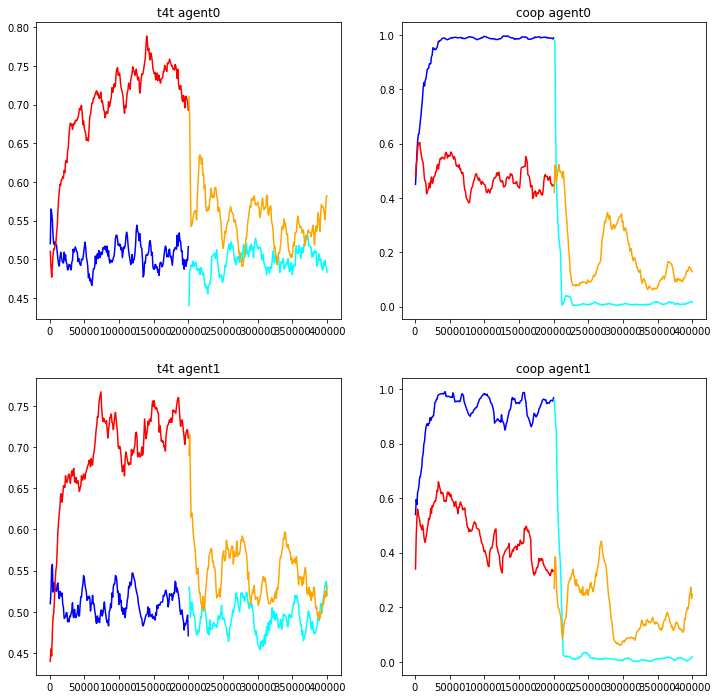

In [150]:
colors = plt.cm.inferno(np.linspace(0,1,4))
colors = ['red','blue','cyan', 'orange']
colors = ['orange','cyan', 'red','blue']
colors = ['orange','cyan','blue', 'red']
colors = ['cyan','orange','blue', 'red']
colors = ['blue', 'red','cyan','orange']

n_average = 10

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,12))
for i, df1 in enumerate(data):
    timesteps = df1['timesteps_total']#[::n_average]
    
#     t4t_frac_agent0 = [np.mean(df1['t4t_frac_agent-0'][j:j+n_average]) for j in np.arange(0,len(df1['timesteps_total']), n_average)]
    t4t_frac_agent0 = rolling_average(df1['t4t_frac_agent-0'], n_average)
    t4t_frac_agent1 = rolling_average(df1['t4t_frac_agent-1'], n_average)
    coop_frac_agent0 = rolling_average(df1['coop_frac_agent-0'], n_average)
    coop_frac_agent1 = rolling_average(df1['coop_frac_agent-1'], n_average)
    
    ax[0,0].plot(timesteps, t4t_frac_agent0, color=colors[i])
#     ax[0,0].plot(df1['timesteps_total'],df1['t4t_frac_agent-0'])
    ax[0,0].title.set_text('t4t agent0')
    
    ax[0,1].plot(timesteps, coop_frac_agent0, color=colors[i])
    ax[0,1].title.set_text('coop agent0')

    ax[1,0].plot(timesteps, t4t_frac_agent1, color=colors[i])
    ax[1,0].title.set_text('t4t agent1')
    
    ax[1,1].plot(timesteps, coop_frac_agent1, color=colors[i])
    ax[1,1].title.set_text('coop agent1')


In [93]:
np.arange(0,10,3)

array([0, 3, 6, 9])

In [94]:
aa = np.linspace(-10,10,1000)
bb = np.convolve(aa, np.ones(10), 'valid')

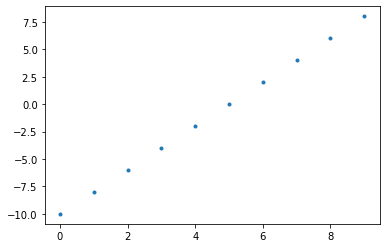

In [95]:
plt.plot(aa[::100],'.')

In [63]:
lr_options = [0.001, 0.0001, 5e-5, 1e-5, 1e-6]
gamma_options = [0.5, 0.8, 0.9, 0.95, 0.99, 0.999]

In [64]:
def color_fun(dir_name):
    
    lr_got = False
    for i in range(len(lr_options)):
        if 'lr='+ str(lr_options[i]) in dir_name:
            lr_got = True
            break
    gamma_got = False
    for j in range(len(gamma_options)):
        if 'gamma='+ str(gamma_options[j])+',' in dir_name:
            gamma_got = True
            break
    if not lr_got or not gamma_got:
        print('error:' + dir_name)
    else:
        color = np.array([i/len(lr_options), j/len(gamma_options), j/len(gamma_options)*0,0.5])

    return color

In [65]:
str(lr_options[-1])

'1e-06'

In [66]:
base_dir = '/home/peter/Documents/ML/rl_ipd/more_runs/'
exp_dir = 'MA_random_length_nodoneatend_PPO2/'
exp_dir = 'MA_random_length_DQN3/'


In [96]:
base_dir = '/home/peter/Documents/ML/rl_ipd/MA_runs/small1/MA/'
exp_dir_ppo = 'MA_PPO2/'
exp_dir_dqn = 'MA_DQN2/'

In [68]:
base_dir = '/home/peter/Documents/ML/rl_ipd/more_runs/MA_lstm/'
exp_dir = 'MA_PPO2/'

In [69]:
base_dir = '/home/peter/Documents/ML/rl_ipd/more_runs/MA_ppo_rerun/'
base_dir = '/home/peter/Documents/ML/rl_ipd/more_runs/MA_ppo_rerun_rl/'

exp_dirs = ['MA_PPO2_same/', 'MA_PPO2_diff/', 'MA_PPO2_diff_sl5/', 'MA_PPO2_diff_sl5_2/']
exp_dir = exp_dirs[-1]

In [97]:

data= []
colors = []
dirs = []
for dir_i, dir1 in enumerate(os.listdir(base_dir + exp_dir)):
            
    if os.path.isdir(base_dir + exp_dir+'/'+dir1):
        
        progress_path = base_dir + exp_dir+'/'+dir1+'/progress.csv'
        error_path = base_dir + exp_dir+'/'+dir1+'/error.txt'

        if os.path.exists(progress_path):  
            
            if os.path.exists(error_path):
                print('error: ' + dir1)
            
            else:
            
                
                df1 = pd.read_csv(progress_path)
                data.append(df1)
                colors.append(color_fun(dir1))
                dirs.append(dir1)

In [111]:
base_dir = '/home/peter/Documents/ML/rl_ipd/MA_runs/small1/MA/'
exp_dir_ppo = 'MA_PPO2/'
exp_dir_dqn = 'MA_DQN2/'


data_ppo= []
dirs_ppo = []
exp_dir = exp_dir_ppo
for dir_i, dir1 in enumerate(os.listdir(base_dir + exp_dir)):
            
    if os.path.isdir(base_dir + exp_dir+'/'+dir1):
        
        progress_path = base_dir + exp_dir+'/'+dir1+'/progress.csv'
        error_path = base_dir + exp_dir+'/'+dir1+'/error.txt'

        if os.path.exists(progress_path):  
            
            if os.path.exists(error_path):
                print('error: ' + dir1)
            
            else:
            
                
                df1 = pd.read_csv(progress_path)
                data_ppo.append(df1)
#                 colors.append(color_fun(dir1))
                dirs_ppo.append(dir1)
#                 print(dir1)

data_dqn= []
dirs_dqn = []
exp_dir = exp_dir_dqn

for dir_i, dir1 in enumerate(os.listdir(base_dir + exp_dir_dqn)):
            
    if os.path.isdir(base_dir + exp_dir+'/'+dir1):
        
        progress_path = base_dir + exp_dir+'/'+dir1+'/progress.csv'
        error_path = base_dir + exp_dir+'/'+dir1+'/error.txt'

        if os.path.exists(progress_path):  
            
            if os.path.exists(error_path):
                print('error: ' + dir1)
            
            else:
            
                
                df1 = pd.read_csv(progress_path)
                data_dqn.append(df1)
#                 colors.append(color_fun(dir1))
                dirs_dqn.append(dir1)


In [112]:
data_ppo

[    episode_reward_max  episode_reward_min  episode_reward_mean  \
 0                483.0               416.0              452.225   
 1                483.0               406.0              446.400   
 2                483.0               406.0              439.970   
 3                465.0               397.0              430.890   
 4                471.0               397.0              426.570   
 ..                 ...                 ...                  ...   
 95               460.0               401.0              433.990   
 96               460.0               411.0              432.650   
 97               460.0               404.0              429.780   
 98               451.0               404.0              430.230   
 99               451.0               404.0              429.790   
 
     episode_len_mean  episodes_this_iter  num_healthy_workers  \
 0              100.0                  40                    2   
 1              100.0                  40         

PPO_two_agent_MG_env_14e02_00010_10_gamma=0.8,lr=0.0001_2021-08-21_11-05-14
DQN_two_agent_MG_env_f14d1_00010_10_gamma=0.8,lr=0.0001_2021-08-20_11-05-29


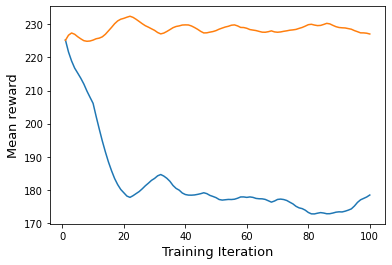

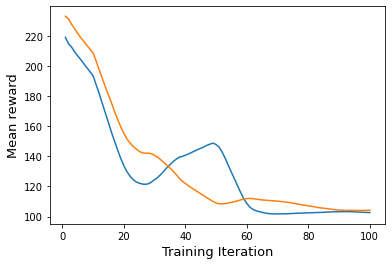

In [121]:
n_average = 10

# fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,8))

lfs = 13
fig = plt.figure()
dirs = dirs_ppo
data = data_ppo
for i, df1 in enumerate(data):
    if 'lr=0.0001' in dirs[i] and 'gamma=0.8,' in dirs[i]:
        print(dirs[i])
        timesteps = df1['timesteps_total']#[::n_average]
        training_iteration_ppo = df1['training_iteration']

    #     t4t_frac_agent0 = [np.mean(df1['t4t_frac_agent-0'][j:j+n_average]) for j in np.arange(0,len(df1['timesteps_total']), n_average)]
        min_reward_agent0_ppo = rolling_average(df1['policy_reward_min/agent-0'], n_average)
        mean_reward_agent0_ppo = rolling_average(df1['policy_reward_mean/agent-0'], n_average)
        max_reward_agent0_ppo = rolling_average(df1['policy_reward_max/agent-0'], n_average)
        min_reward_agent1_ppo = rolling_average(df1['policy_reward_min/agent-1'], n_average)
        mean_reward_agent1_ppo = rolling_average(df1['policy_reward_mean/agent-1'], n_average)
        max_reward_agent1_ppo = rolling_average(df1['policy_reward_max/agent-1'], n_average)


        plt.plot(training_iteration_ppo, mean_reward_agent0_ppo)
        plt.plot(training_iteration_ppo, mean_reward_agent1_ppo)
        plt.ylabel("Mean reward", fontsize=lfs)
        plt.xlabel('Training Iteration', fontsize=lfs)
        plt.savefig('lc_' + dirs[i] + '.png', bbox_inches='tight')
n_average = 10

# fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,8))
fig = plt.figure()
dirs = dirs_dqn
data = data_dqn
for i, df1 in enumerate(data):
    if 'lr=0.0001' in dirs[i] and 'gamma=0.8,' in dirs[i]:
        print(dirs[i])
        timesteps = df1['timesteps_total']#[::n_average]
        training_iteration_dqn = df1['training_iteration']

    #     t4t_frac_agent0 = [np.mean(df1['t4t_frac_agent-0'][j:j+n_average]) for j in np.arange(0,len(df1['timesteps_total']), n_average)]
        min_reward_agent0_dqn = rolling_average(df1['policy_reward_min/agent-0'], n_average)
        mean_reward_agent0_dqn = rolling_average(df1['policy_reward_mean/agent-0'], n_average)
        max_reward_agent0_dqn = rolling_average(df1['policy_reward_max/agent-0'], n_average)
        min_reward_agent1_dqn = rolling_average(df1['policy_reward_min/agent-1'], n_average)
        mean_reward_agent1_dqn = rolling_average(df1['policy_reward_mean/agent-1'], n_average)
        max_reward_agent1_dqn = rolling_average(df1['policy_reward_max/agent-1'], n_average)


        plt.plot(training_iteration_dqn, mean_reward_agent0_dqn)
        plt.plot(training_iteration_dqn, mean_reward_agent1_dqn)
        plt.ylabel("Mean reward", fontsize=lfs)
        plt.xlabel('Training Iteration', fontsize=lfs)
        plt.savefig('lc_' + dirs[i] + '.png', bbox_inches='tight')
        

In [119]:
dir1

'DQN_two_agent_MG_env_f14d1_00024_24_gamma=0.999,lr=1e-06_2021-08-20_15-53-45'

In [87]:
colors

[array([0.4       , 0.33333333, 0.        , 0.5       ]),
 array([0.4, 0.5, 0. , 0.5]),
 array([0.8       , 0.83333333, 0.        , 0.5       ]),
 array([0.        , 0.16666667, 0.        , 0.5       ]),
 array([0.4       , 0.66666667, 0.        , 0.5       ]),
 array([0.8, 0.5, 0. , 0.5]),
 array([0.2, 0.5, 0. , 0.5]),
 array([0.2, 0. , 0. , 0.5]),
 array([0.8       , 0.16666667, 0.        , 0.5       ]),
 array([0.6       , 0.16666667, 0.        , 0.5       ]),
 array([0.2       , 0.83333333, 0.        , 0.5       ]),
 array([0.2       , 0.16666667, 0.        , 0.5       ]),
 array([0.4, 0. , 0. , 0.5]),
 array([0.2       , 0.66666667, 0.        , 0.5       ]),
 array([0.8       , 0.33333333, 0.        , 0.5       ]),
 array([0.        , 0.83333333, 0.        , 0.5       ]),
 array([0.6, 0. , 0. , 0.5]),
 array([0.6       , 0.83333333, 0.        , 0.5       ]),
 array([0.4       , 0.16666667, 0.        , 0.5       ]),
 array([0.        , 0.33333333, 0.        , 0.5       ]),
 array([

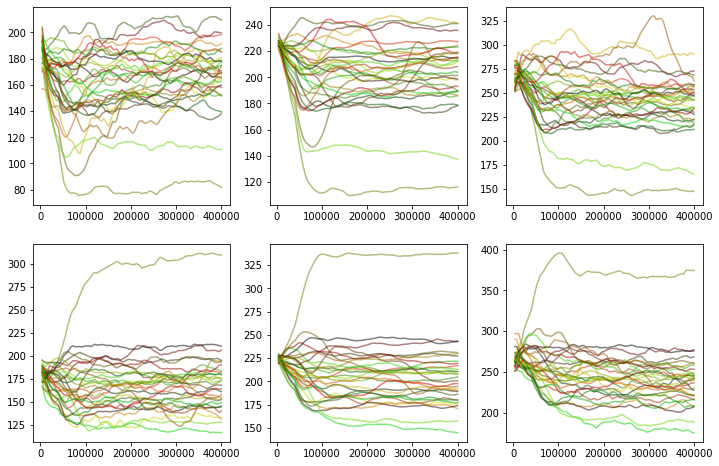

In [88]:
n_average = 10

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(12,8))
for i, df1 in enumerate(data):
    timesteps = df1['timesteps_total']#[::n_average]
    
#     t4t_frac_agent0 = [np.mean(df1['t4t_frac_agent-0'][j:j+n_average]) for j in np.arange(0,len(df1['timesteps_total']), n_average)]
    min_reward_agent0 = rolling_average(df1['policy_reward_min/agent-0'], n_average)
    mean_reward_agent0 = rolling_average(df1['policy_reward_mean/agent-0'], n_average)
    max_reward_agent0 = rolling_average(df1['policy_reward_max/agent-0'], n_average)
    min_reward_agent1 = rolling_average(df1['policy_reward_min/agent-1'], n_average)
    mean_reward_agent1 = rolling_average(df1['policy_reward_mean/agent-1'], n_average)
    max_reward_agent1 = rolling_average(df1['policy_reward_max/agent-1'], n_average)

    
    ax[0,0].plot(timesteps, min_reward_agent0, color=colors[i])    
    ax[0,1].plot(timesteps, mean_reward_agent0, color=colors[i])
    ax[0,2].plot(timesteps, max_reward_agent0, color=colors[i])

    ax[1,0].plot(timesteps, min_reward_agent1, color=colors[i])    
    ax[1,1].plot(timesteps, mean_reward_agent1, color=colors[i])
    ax[1,2].plot(timesteps, max_reward_agent1, color=colors[i])

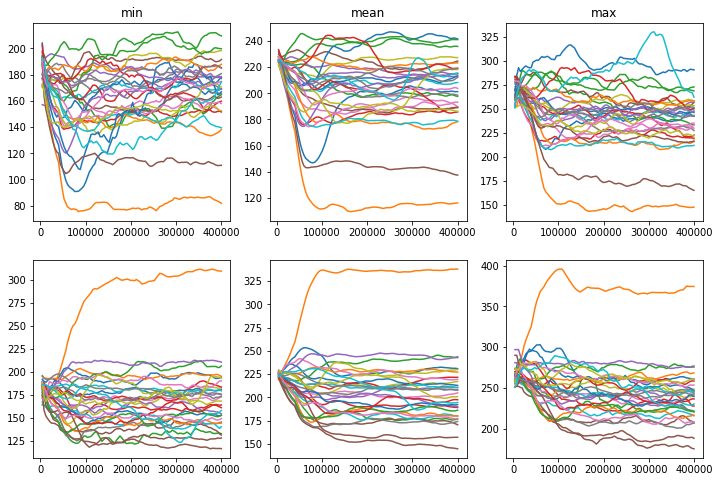

In [89]:
n_average = 10

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(12,8))
for i, df1 in enumerate(data):
    timesteps = df1['timesteps_total']#[::n_average]
    
#     t4t_frac_agent0 = [np.mean(df1['t4t_frac_agent-0'][j:j+n_average]) for j in np.arange(0,len(df1['timesteps_total']), n_average)]
    min_reward_agent0 = rolling_average(df1['policy_reward_min/agent-0'], n_average)
    mean_reward_agent0 = rolling_average(df1['policy_reward_mean/agent-0'], n_average)
    max_reward_agent0 = rolling_average(df1['policy_reward_max/agent-0'], n_average)
    min_reward_agent1 = rolling_average(df1['policy_reward_min/agent-1'], n_average)
    mean_reward_agent1 = rolling_average(df1['policy_reward_mean/agent-1'], n_average)
    max_reward_agent1 = rolling_average(df1['policy_reward_max/agent-1'], n_average)

    
    ax[0,0].plot(timesteps, min_reward_agent0)    
    ax[0,1].plot(timesteps, mean_reward_agent0)
    ax[0,2].plot(timesteps, max_reward_agent0)

    ax[1,0].plot(timesteps, min_reward_agent1)    
    ax[1,1].plot(timesteps, mean_reward_agent1)
    ax[1,2].plot(timesteps, max_reward_agent1)
    
ax[0,0].title.set_text('min')
ax[0,1].title.set_text('mean')
ax[0,2].title.set_text('max')

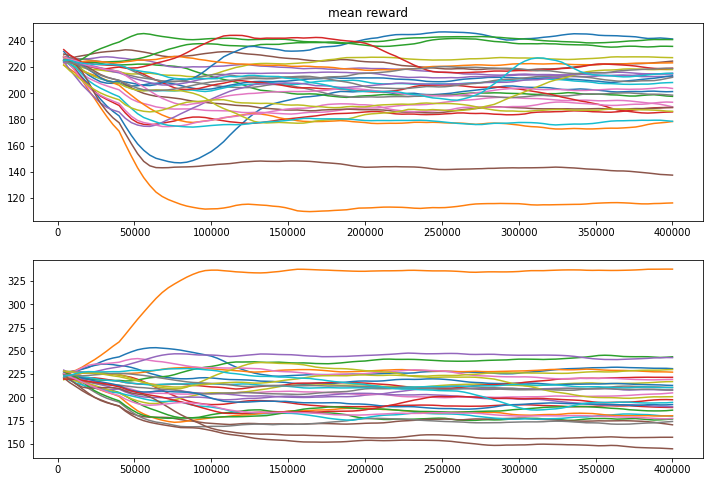

In [145]:
n_average = 10

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12,8))
for i, df1 in enumerate(data):
    timesteps = df1['timesteps_total']#[::n_average]
    
#     t4t_frac_agent0 = [np.mean(df1['t4t_frac_agent-0'][j:j+n_average]) for j in np.arange(0,len(df1['timesteps_total']), n_average)]
    min_reward_agent0 = rolling_average(df1['policy_reward_min/agent-0'], n_average)
    mean_reward_agent0 = rolling_average(df1['policy_reward_mean/agent-0'], n_average)
    max_reward_agent0 = rolling_average(df1['policy_reward_max/agent-0'], n_average)
    min_reward_agent1 = rolling_average(df1['policy_reward_min/agent-1'], n_average)
    mean_reward_agent1 = rolling_average(df1['policy_reward_mean/agent-1'], n_average)
    max_reward_agent1 = rolling_average(df1['policy_reward_max/agent-1'], n_average)

    
    ax[0].plot(timesteps, mean_reward_agent0)

    ax[1].plot(timesteps, mean_reward_agent1)
    
ax[0].title.set_text('mean reward')


PPO_two_agent_MG_env_14e02_00004_4_gamma=0.8,lr=0.001_2021-08-20_11-20-48
PPO_two_agent_MG_env_14e02_00000_0_gamma=0.999,lr=0.001_2021-08-20_11-20-47
PPO_two_agent_MG_env_14e02_00003_3_gamma=0.9,lr=0.001_2021-08-20_11-20-47
PPO_two_agent_MG_env_14e02_00002_2_gamma=0.95,lr=0.001_2021-08-20_11-20-47
PPO_two_agent_MG_env_14e02_00005_5_gamma=0.5,lr=0.001_2021-08-21_01-44-01
PPO_two_agent_MG_env_14e02_00001_1_gamma=0.99,lr=0.001_2021-08-20_11-20-47


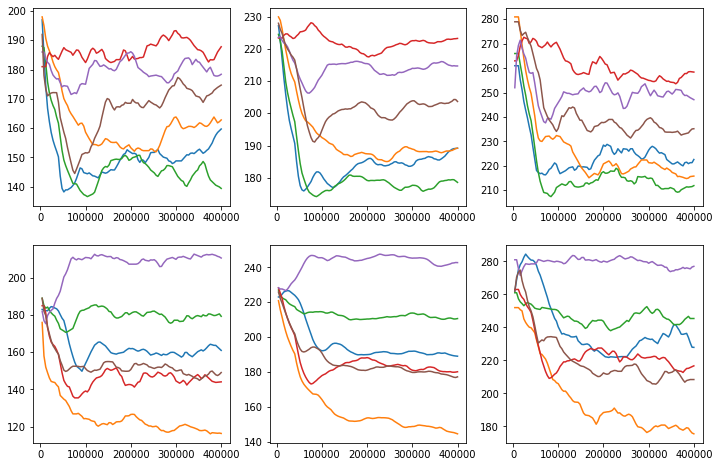

In [91]:
n_average = 10

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(12,8))
for i, df1 in enumerate(data):
    if 'lr=0.001' in dirs[i]:# and 'gamma=0.9,' in dirs[i]:
        print(dirs[i])
        timesteps = df1['timesteps_total']#[::n_average]

    #     t4t_frac_agent0 = [np.mean(df1['t4t_frac_agent-0'][j:j+n_average]) for j in np.arange(0,len(df1['timesteps_total']), n_average)]
        min_reward_agent0 = rolling_average(df1['policy_reward_min/agent-0'], n_average)
        mean_reward_agent0 = rolling_average(df1['policy_reward_mean/agent-0'], n_average)
        max_reward_agent0 = rolling_average(df1['policy_reward_max/agent-0'], n_average)
        min_reward_agent1 = rolling_average(df1['policy_reward_min/agent-1'], n_average)
        mean_reward_agent1 = rolling_average(df1['policy_reward_mean/agent-1'], n_average)
        max_reward_agent1 = rolling_average(df1['policy_reward_max/agent-1'], n_average)


        ax[0,0].plot(timesteps, min_reward_agent0)    
        ax[0,1].plot(timesteps, mean_reward_agent0)
        ax[0,2].plot(timesteps, max_reward_agent0)

        ax[1,0].plot(timesteps, min_reward_agent1)    
        ax[1,1].plot(timesteps, mean_reward_agent1)
        ax[1,2].plot(timesteps, max_reward_agent1)

PPO_two_agent_MG_env_14e02_00014_14_gamma=0.95,lr=5e-05_2021-08-21_20-25-59


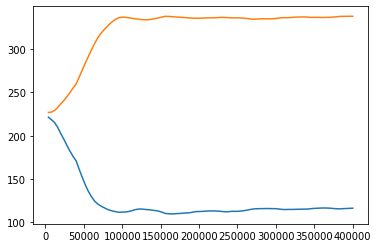

In [92]:
n_average = 10

# fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,8))
for i, df1 in enumerate(data):
    if 'lr=5e-05' in dirs[i] and 'gamma=0.95,' in dirs[i]:
        print(dirs[i])
        timesteps = df1['timesteps_total']#[::n_average]
        training_iteration_ppo = df1['training_iteration']

    #     t4t_frac_agent0 = [np.mean(df1['t4t_frac_agent-0'][j:j+n_average]) for j in np.arange(0,len(df1['timesteps_total']), n_average)]
        min_reward_agent0_ppo = rolling_average(df1['policy_reward_min/agent-0'], n_average)
        mean_reward_agent0_ppo = rolling_average(df1['policy_reward_mean/agent-0'], n_average)
        max_reward_agent0_ppo = rolling_average(df1['policy_reward_max/agent-0'], n_average)
        min_reward_agent1_ppo = rolling_average(df1['policy_reward_min/agent-1'], n_average)
        mean_reward_agent1_ppo = rolling_average(df1['policy_reward_mean/agent-1'], n_average)
        max_reward_agent1_ppo = rolling_average(df1['policy_reward_max/agent-1'], n_average)


        plt.plot(timesteps, mean_reward_agent0_ppo)
        plt.plot(timesteps, mean_reward_agent1_ppo)


DQN_two_agent_MG_env_f14d1_00015_15_gamma=0.9,lr=5e-05_2021-08-20_15-51-08


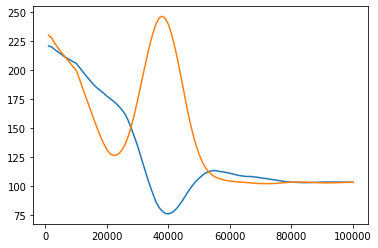

In [99]:
n_average = 10

# fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,8))
for i, df1 in enumerate(data):
    if 'lr=5e-05' in dirs[i] and 'gamma=0.9,' in dirs[i]:
        print(dirs[i])
        timesteps = df1['timesteps_total']#[::n_average]
        training_iteration_dqn = df1['training_iteration']

    #     t4t_frac_agent0 = [np.mean(df1['t4t_frac_agent-0'][j:j+n_average]) for j in np.arange(0,len(df1['timesteps_total']), n_average)]
        min_reward_agent0_dqn = rolling_average(df1['policy_reward_min/agent-0'], n_average)
        mean_reward_agent0_dqn = rolling_average(df1['policy_reward_mean/agent-0'], n_average)
        max_reward_agent0_dqn = rolling_average(df1['policy_reward_max/agent-0'], n_average)
        min_reward_agent1_dqn = rolling_average(df1['policy_reward_min/agent-1'], n_average)
        mean_reward_agent1_dqn = rolling_average(df1['policy_reward_mean/agent-1'], n_average)
        max_reward_agent1_dqn = rolling_average(df1['policy_reward_max/agent-1'], n_average)


        plt.plot(timesteps, mean_reward_agent0_dqn)
        plt.plot(timesteps, mean_reward_agent1_dqn)


Text(0.5, 1.0, 'PPO, lr=5e-05, gamma=0.8')

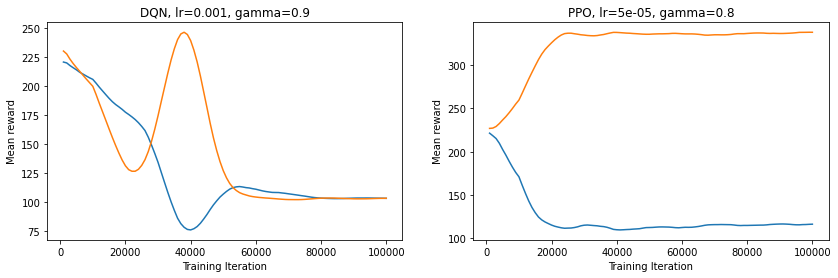

In [101]:
fig = plt.figure(figsize=(14,4))

fig.add_subplot(1,2,1)
plt.plot(timesteps, mean_reward_agent0_dqn)
plt.plot(timesteps, mean_reward_agent1_dqn)
plt.ylabel("Mean reward")
plt.xlabel('Training Iteration')
plt.title('DQN, lr=0.001, gamma=0.9')

fig.add_subplot(1,2,2)
plt.plot(timesteps, mean_reward_agent0_ppo)
plt.plot(timesteps, mean_reward_agent1_ppo)
plt.ylabel("Mean reward")
plt.xlabel('Training Iteration')
plt.title('PPO, lr=5e-05, gamma=0.8')


PPO_two_agent_MG_env_14e02_00025_25_gamma=0.99,lr=1e-06_2021-08-23_00-29-40


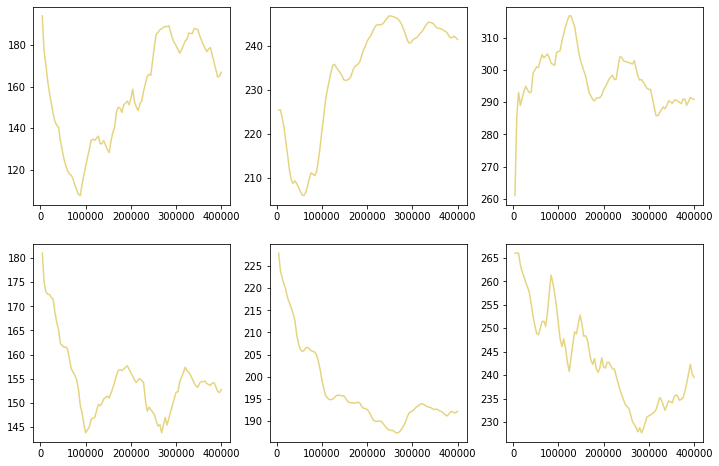

In [113]:
n_average = 10

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(12,8))
for i, df1 in enumerate(data):
    if i == len(dirs) -10:
        print(dirs[i])
        timesteps = df1['timesteps_total']#[::n_average]

    #     t4t_frac_agent0 = [np.mean(df1['t4t_frac_agent-0'][j:j+n_average]) for j in np.arange(0,len(df1['timesteps_total']), n_average)]
        min_reward_agent0 = rolling_average(df1['policy_reward_min/agent-0'], n_average)
        mean_reward_agent0 = rolling_average(df1['policy_reward_mean/agent-0'], n_average)
        max_reward_agent0 = rolling_average(df1['policy_reward_max/agent-0'], n_average)
        min_reward_agent1 = rolling_average(df1['policy_reward_min/agent-1'], n_average)
        mean_reward_agent1 = rolling_average(df1['policy_reward_mean/agent-1'], n_average)
        max_reward_agent1 = rolling_average(df1['policy_reward_max/agent-1'], n_average)


        ax[0,0].plot(timesteps, min_reward_agent0, color=colors[i])    
        ax[0,1].plot(timesteps, mean_reward_agent0, color=colors[i])
        ax[0,2].plot(timesteps, max_reward_agent0, color=colors[i])

        ax[1,0].plot(timesteps, min_reward_agent1, color=colors[i])    
        ax[1,1].plot(timesteps, mean_reward_agent1, color=colors[i])
        ax[1,2].plot(timesteps, max_reward_agent1, color=colors[i])

In [ ]:
df1